<a href="https://colab.research.google.com/github/matvb/Sudoku-Genetico/blob/main/Tarefa_5_Algoritmo_Gen%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligência Artifical
## Tarefa 5 - Algoritmo Genético
### Mateus de Almeida Villas Boas
### DRE: 115054675



## Imports

In [2]:
import numpy as np
import random
import math

## Implementação do Algoritmo Genético


### Preenchendo a matriz real do problema (9x9)


Esta é a matriz do problema o qual é preciso achar a solução.
<br>
<br>
Como ela é uma matriz específica, com tamanho e preenchimento inicial definidos, decidi fazer a instanciação inicial dela de maneira hard-coded.
<br>
<br>
tam_tabuleiro -> Decide o tamanho dos lados da matriz
np.zeros((tam_tabuleiro,tam_tabuleiro)) -> Cria a matriz de zeros quadrada de lado tam_tabuleiro
<br>
<br>
Depois da função preenche_fixos, todos os campos "vazios" estarão preenchidos com zero, sinalizando para as próximas funções onde poderão ser alocados os números variáveis. E os já preenchidos nessa função serão fixos até o término do programa.



<div>
<img src="https://drive.google.com/thumbnail?id=1yezhTg1ErTEjZgBPnpy4E5nGTg39xt9i&authuser=0&sz=w1423-h789" width="300"/>
</div>



In [25]:
tam_tabuleiro = 9
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
tabuleiro_original = np.copy(tabuleiro)

def preenche_fixos(tab):
  tab[0][3] = 7
  tab[1][0] = 1
  tab[2][3] = 4
  tab[2][4] = 3
  tab[2][6] = 2
  tab[3][8] = 6
  tab[4][3] = 5
  tab[4][5] = 9
  tab[5][6] = 4
  tab[5][7] = 1
  tab[5][8] = 8
  tab[6][4] = 8
  tab[6][5] = 1
  tab[7][3] = 2
  tab[7][7] = 5
  tab[8][1] = 4
  tab[8][6] = 3

  num_variaveis = (tab == 0).sum()

  return tab, num_variaveis

### Preenchendo uma matriz teste (4X4)




Esta é uma matriz teste consideravelmente mais fácil de se trabalhar e achar a solução do que a matriz real do problema
<br>
<br>
Toda a função de preenchimento é igual exceto pelos valores fixos e pelo valor de tam_tabuleiro


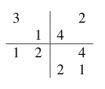

Matriz exemplo tirada do exercício 1 da lista de exercícios da semana 6


In [14]:
tam_tabuleiro = 4
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
tabuleiro_original = np.copy(tabuleiro)

def preenche_fixos(tab):
  tab[0][0] = 3
  tab[1][1] = 1
  tab[2][0] = 1
  tab[2][1] = 2
  tab[1][2] = 4
  tab[0][3] = 2
  tab[2][3] = 4
  tab[3][2] = 2
  tab[3][3] = 1

  num_variaveis = (tab == 0).sum()

  return tab, num_variaveis

### Criando tabuleiro campos iniciais com números escolhidos aleatoriamente no intervalo de números possíveis (de 1 até tam_tabuleiro)



<br>
Todos os campos considerados vazios (campos com valor 0), são preenchidos agora por um numero aleatório dentre os possíveis de acordo com o tamanho do Sudoku (entre 1 e tam_tabuleiro).
<br>
<br>
Todas as coordenadas preenchidas nesse processo são guardadas na lista "variáveis", pois serão elas as variáveis da função.
<br>
<br>
Somente os campos correspondentes as coordenadas gravadas nessa lista poderão ser mudadas no processo de Hill Climbing, fazendo com os números que foram preenchidos anteriormente permanecam fixos.

In [ ]:
def preenche_iniciais(tab):
  variaveis_coord = []
  variaveis = []
  for i,row in enumerate(tab):
    for j,value in enumerate(row):
      if value == 0:
        num_rand = random.randint(1, tam_tabuleiro)
        tab[i][j] = num_rand
        variaveis_coord.append((i,j))
        variaveis.append(num_rand)

  return tab, variaveis

### Contrução da população inicial
N = Número de individuos da população
<br>
Retorno: Um conjunto de N indivíduos gerados aleatoriamente que correspondem a configurações do tabuleiro.

In [4]:
def pop_inicial(N, num_variaveis):
  pop_init = []
  
  for i in range(N):
    aux = []
    for j in range(num_variaveis):
      num_rand = random.randint(1, tam_tabuleiro)
      aux.append(num_rand)
    pop_init.append(aux)

  return pop_init



### Função objetivo

<br>
O valor retornado pela função objetivo é o número de casas erradas no tabuleiro. É uma função de minimização visto que o objetivo final é ter um tabuleiro em que a quantidade de casas erradas seja 0.
<br>
<br>
A função acha esse número percorrendo o tabuleiro e cada vez que um número se repete em uma mesma linha, coluna ou bloco é somado 1.
<br>
<br>
Se uma linha tiver três casas com o número 5 e duas casas com o número 7. A função somará 3 ao total. Porque existem dois número 5 errados e um número 7 errado nesta fileira.
<br>
<br>
Faz-se a mesma coisa para todas as fileiras, colunas e blocos e tem-se o valor total da função que é retornado.



In [5]:
def interpreta_como_tabuleiro(tab_orig, list_variaveis_orig):
  tab = np.copy(tab_orig)
  list_variaveis = list_variaveis_orig.copy()
  for i,row in enumerate(tab):
    for j,value in enumerate(row):
      if value == 0:
        tab[i][j] = list_variaveis[0]
        list_variaveis.pop(0)

  return tab

def objetivo(tab_orig, list_variaveis):
  tab = interpreta_como_tabuleiro(tab_orig, list_variaveis)

  soma_col = 0
  soma_row = 0
  soma_bloco = 0
  ja_computados =[]

  # Calcula o somatório da diferença da soma de cada linha e coluna em relação a soma certa.
  for i, row in enumerate(tab):
    aux_row = 0
    aux_col = 0
    aux_row2 = []
    aux_col2 = []

    for j, value in enumerate(row):
      if (value in aux_row2) and ((i,j) not in ja_computados):
        ja_computados.append((i,j))
        aux_row += 1
      aux_row2.append(value)
      if (tab[j][i] in aux_col2) and ((i,j) not in ja_computados):
        ja_computados.append((j,i))
        aux_col += 1
      aux_col2.append(tab[j][i])

    soma_row += aux_row
    soma_col += aux_col

  # Calcula o somatório da diferença da soma de cada bloco interno em relação a soma certa.
  tam_bloco = int(math.sqrt(tam_tabuleiro))
  quant_blocos = (tam_tabuleiro**2)/(tam_bloco**2)
  for bloco1 in range(tam_bloco):
    for bloco2 in range(tam_bloco):
      aux_bloco = 0
      aux_bloco2 = []
      for i in range(tam_bloco):
        for j in range(tam_bloco):
          if (tab[i+(tam_bloco*bloco1)][j+(tam_bloco*bloco2)] in aux_bloco2) and ((i,j) not in ja_computados):
            ja_computados.append((j,i))
            aux_bloco += 1
          aux_bloco2.append(tab[i+(tam_bloco*bloco1)][j+(tam_bloco*bloco2)])

      soma_bloco += aux_bloco

  # Soma os calculos anterios para linhas, colunas e blocos para ter o valor da função para o tabuleiro todo.
  
  soma_total = soma_row + soma_col + soma_bloco
  soma_total_invert = (tam_tabuleiro*tam_tabuleiro) - soma_total
  return soma_total_invert

### Função Roleta


In [6]:
def calc_roleta(valores_objetivo):
  roleta = []
  for index, i  in enumerate(valores_objetivo):
    if index == 0:
      roleta.append(i)
    else:
      roleta.append(roleta[-1]+i)

  return roleta

#### População intermediária

In [7]:
def pop_intermediaria(pop_init):
  pop_intermed = []

  valores_objetivo = []
  for i in pop_init:
    valores_objetivo.append(objetivo(tabuleiro, i))

  roleta = calc_roleta(valores_objetivo)
  print("Roleta: \n", roleta, "\n")

  valores_sorteados = []
  for i in range(len(pop_init)):
    sorteio = random.uniform(0,roleta[-1])
    valores_sorteados.append(sorteio)
  print("Valores Sorteados: \n", valores_sorteados, "\n")

  for index_i, valor_sorteado in enumerate(valores_sorteados):
    for index_j, j in enumerate(roleta):
      if valor_sorteado <= j:
        pop_intermed.append(pop_init[index_j])
        break

  return pop_intermed

### CrossOver

In [8]:
def crossover(elemento1, elemento2, quant_cortes):
  tam_elemento = len(elemento1)
  novo1 = []
  novo2 = []

  cortes = []
  for i in range(quant_cortes):
    corte = random.randint(1,tam_elemento-1)
    while corte in cortes:
      corte = random.randint(1,tam_elemento-1)
    cortes.append(corte)

  cortes.sort()
  cortes.append('fim')


  print("cortes", cortes)
  for index_i, i in enumerate(cortes):
    for j in range(tam_elemento):  
      if i != "fim":    
        if (j < i):
          if (j+1 > len(novo1)):
            if (index_i % 2) == 0:
              novo1.append(elemento1[j])
              novo2.append(elemento2[j])
            else:
              novo1.append(elemento2[j])
              novo2.append(elemento1[j])
        else:
          break

      else:
        if (j+1 > len(novo1)):
          if (index_i % 2) == 0:
            novo1.append(elemento1[j])
            novo2.append(elemento2[j])
          else:
            novo1.append(elemento2[j])
            novo2.append(elemento1[j])

  
  return novo1, novo2



### Mutação

In [9]:
def mutacao(individuo, quant_genes):
  novo_individuo = list(individuo)
  index_genes_mutados = []
  for i in range(quant_genes):
    index = random.randint(0,len(individuo)-1)
    while index in index_genes_mutados:
      index = random.randint(0,len(individuo)-1)

    index_genes_mutados.append(index)

  print("Genes mutados:", index_genes_mutados)

  for i in index_genes_mutados:
    aux = individuo[i]
    novo_valor = random.randint(1,tam_tabuleiro)
    while novo_valor == aux:
      novo_valor = random.randint(1,tam_tabuleiro)
    
    novo_individuo[i] = novo_valor


  return novo_individuo
    


### Função Principal

In [ ]:
# Parâmetros para colorir e formatar o print dos textos
CBOLD     = '\33[1m'
CRED = '\033[91m'
CGREEN  = '\33[92m'
CBLUE   = '\33[34m'
CEND = '\033[0m'

def parametros_fixos(letra):
  if letra == 'a':
    N = 100
    prob_crossover = 0.80
    pts_crossover = 1
    prob_mutacao = 0.03
    genes_mutados = 2
    num_geracoes = 100
  elif letra == 'b':
    N = 100
    prob_crossover = 0.80
    pts_crossover = 3
    prob_mutacao = 0.03
    genes_mutados = 2
    num_geracoes = 100
  elif letra == 'c':
    N = 100
    prob_crossover = 0.80
    pts_crossover = 3
    prob_mutacao = 0.15
    genes_mutados = 2
    num_geracoes = 100

  return N, prob_crossover, pts_crossover, prob_mutacao, genes_mutados, num_geracoes

def main():
  # Probabilidades e valores fixos
  N, prob_crossover, pts_crossover, prob_mutacao, genes_mutados, num_geracoes = parametros_fixos("a")

  
  # Instancia o tabuleiro inicial apenas com os valores fixos preenchidos e determina a quantidade de variaveis possiveis
  global tabuleiro
  tabuleiro, num_variaveis = preenche_fixos(tabuleiro)
  print("Tabuleiro inicial: \n",tabuleiro, "\n")
  print("Número de variáveis:",num_variaveis, "\n")

  # Define o numero N de elementos que uma população inicial deve ter e a cria
  pop_init = pop_inicial(N, num_variaveis)
  print("População inicial: \n", pop_init, "\n")

  i = 0

  pop_testada = pop_init
  for i in range(num_geracoes):
    print(CBOLD,CBLUE,"Geração:", i+1,CEND, "\n")


    pop_intermed = pop_intermediaria(pop_testada)
    print("População intermediária: \n", pop_intermed, "\n")

    pop_aux = list(pop_intermed)
    pop_crossover = []
    while len(pop_aux) != 0:
      element1_cross = random.choice(pop_aux)
      pop_aux.remove(element1_cross)
      element2_cross = random.choice(pop_aux)
      pop_aux.remove(element2_cross)

      # Testa chance e faz o CrossOver se passar
      if random.random() <= prob_crossover:
        #print(CBOLD,CGREEN,"FAZENDO CROSSOVER",CEND, "\n")
        element1_novo, element2_novo = crossover(element1_cross, element2_cross, pts_crossover)
      else:
        #print(CBOLD,CRED,"NÂO FAZENDO CROSSOVER",CEND, "\n")
        element1_novo = element1_cross
        element2_novo = element2_cross

      pop_crossover.append(element1_novo)
      pop_crossover.append(element2_novo)
    

    print("População depois do CrossOver: \n", pop_crossover, "\n")

    pop_mutacao = []

    for elemento in pop_crossover:
      if random.random() <= prob_mutacao:
        #print(CBOLD,CGREEN,"FAZENDO MUTAÇÂO",CEND, "\n")
        element_novo = mutacao(elemento,genes_mutados)
      else:
        #print(CBOLD,CRED,"NÂO FAZENDO MUTAÇÂO",CEND, "\n")
        element_novo = elemento
      
      pop_mutacao.append(elemento)


    print("População depois da Mutação: \n", pop_mutacao, "\n")

    i += 1

    pop_testada = pop_mutacao

    # Printar os tabuleiros finais
    print(CBOLD,CGREEN,"Tabuleiros da Poupulação final dessa geração: \n", CEND)
    for elemento in pop_testada:
      tab = interpreta_como_tabuleiro(tabuleiro, elemento)
      valor_tab = objetivo(tabuleiro, elemento)
      print(tab," Valor: ", valor_tab, "\n")


    


main()


## Execução e Prints

In [13]:
# Instancia o tabuleiro inicial apenas com os valores fixos preenchidos e determina a quantidade de variaveis possiveis
tabuleiro, num_variaveis = preenche_fixos(tabuleiro)
print("Tabuleiro inicial: \n",tabuleiro, "\n")
print("Número de variáveis:",num_variaveis, "\n")

# Define o numero N de elementos que uma população inicial deve ter e a cria
N = 4
pop_init = pop_inicial(N, num_variaveis)
print("População inicial: \n", pop_init, "\n")

pop_intermed = pop_intermediaria(pop_init)
print("População intermediária: \n", pop_intermed, "\n")


crossover([3, 4, 1, 2, 1, 4, 1], [4, 4, 4, 3, 3, 1, 4],3)


mutacao([3, 4, 1, 2, 1, 4, 1],2)

Tabuleiro inicial: 
 [[3. 0. 0. 2.]
 [0. 1. 4. 0.]
 [1. 2. 0. 4.]
 [0. 0. 2. 1.]] 

Número de variáveis: 7 

População inicial: 
 [[4, 3, 3, 4, 1, 4, 2], [4, 2, 3, 1, 3, 1, 4], [2, 4, 4, 4, 3, 2, 1], [1, 1, 2, 1, 3, 4, 4]] 

Roleta: 
 [10, 20, 27, 38] 

Valores Sorteados: 
 [18.485146205116706, 18.024252480481376, 9.959086383507435, 34.742379714593234] 

População intermediária: 
 [[4, 2, 3, 1, 3, 1, 4], [4, 2, 3, 1, 3, 1, 4], [4, 3, 3, 4, 1, 4, 2], [1, 1, 2, 1, 3, 4, 4]] 

cortes [1, 3, 6, 'fim']
Genes mutados: [5, 6]


[3, 4, 1, 2, 1, 1, 4]